In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
pd.set_option('display.max_colwidth', None)

import numpy as np
import pandas as pd 
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import cv2

(262550, 3)


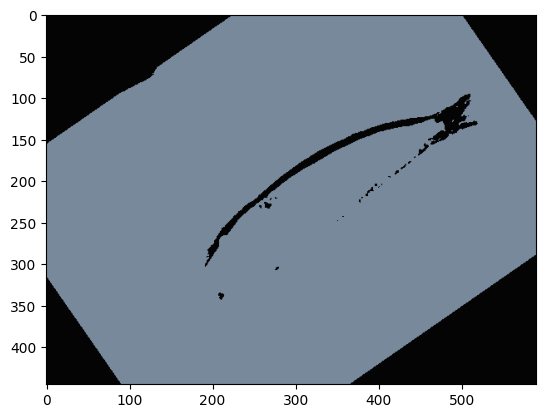

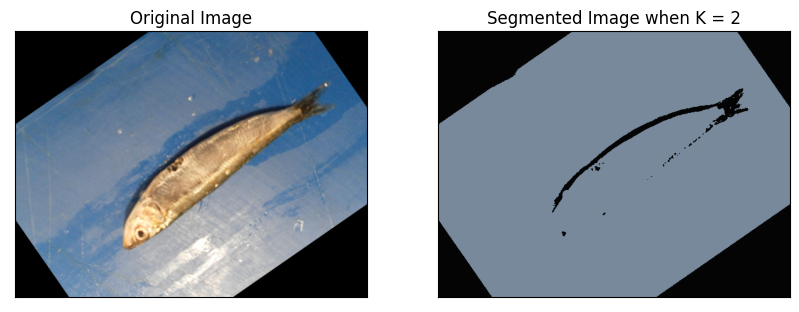

In [2]:
filepath ="./final_dataset/images/img_0.png"
img = cv2.imread(filepath)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def kmeans_segmentation(img, show_image = False):

    vectorized = img.reshape((-1,3))
    vectorized = np.float32(vectorized)
    print(vectorized.shape)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    K=2
    attempts=10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
    label = label.flatten()
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    grayscale = cv2.cvtColor(result_image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    plt.imshow(thresh)
    plt.show()
    return thresh

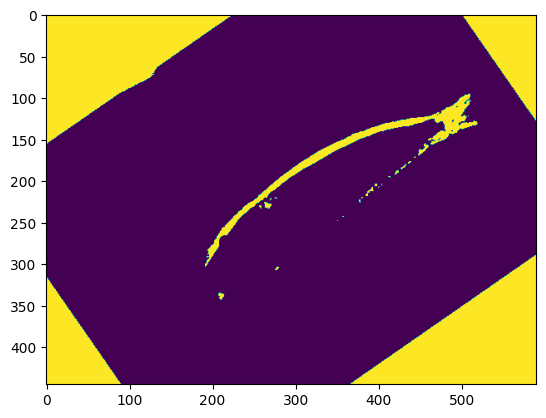

In [7]:
# todo make it read image as binary
def read_true_mask(img_path_str):
    return cv2.cvtColor(cv2.imread(img_path_str),cv2.COLOR_RGB2GRAY)
    
def find_metrics(seg_mask_img, org_mask_img):
    f1, iou, pixacc = 0,0,0 
    intersection = np.sum( np.logical_and(seg_mask_img, org_mask_img) )
    union = np.sum ( np.logical_or(seg_mask_img, org_mask_img) )
    cnt_seg = np.count_nonzero(seg_mask_img)
    cnt_org = np.count_nonzero(org_mask_img)
    h,w = seg_mask_img.shape
    cnt_tot = h*w 
    cnt_true = intersection
    cnt_false = cnt_tot - union 

    f1 = 2 * intersection / (cnt_seg + cnt_org) 
    iou = intersection / union
    pixacc = (cnt_true + cnt_false) / cnt_tot

    return f1, iou, pixacc

def print_all(seg_mask_img, org_mask_img):
    f1, iou, pixacc = find_metrics(seg_mask_img, org_mask_img)
    print("f1 = ", f1, " iou = ", iou, " pixacc = ", pixacc)

In [8]:
print_all(thresh, read_true_mask('./final_dataset/masks/img_0.png'))

f1 =  0.0462237872496978  iou =  0.023658690769210077  pixacc =  0.7235193296514949
